In [80]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import matplotlib
import seaborn as sns  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kstest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set_theme(style="whitegrid")   

In [81]:
df_hmeq = pd.read_csv("hmeq.csv")
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [82]:
df_hmeq.shape

(5960, 13)

In [83]:
print(df_hmeq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


<strong style="color: white;">Il n'existe que deux variables catégorielles à savoir la variable cible BAD, REASON et JOB, les autres étant toutes quantitatives</strong>

In [84]:
print(df_hmeq.describe().T)

          count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.

In [85]:
print(df_hmeq.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [86]:
# pourcentage des valeurs manquantes pour chaque colonne
percent_missing = df_hmeq.isnull().sum() * 100 / len(df_hmeq)
val_manq = pd.DataFrame({'variable': df_hmeq.columns, 'pct_val_manq': percent_missing})

val_manq.sort_values('pct_val_manq', inplace=True, ascending=False)
print(val_manq)

        variable  pct_val_manq
DEBTINC  DEBTINC     21.258389
DEROG      DEROG     11.879195
DELINQ    DELINQ      9.731544
MORTDUE  MORTDUE      8.691275
YOJ          YOJ      8.640940
NINQ        NINQ      8.557047
CLAGE      CLAGE      5.167785
JOB          JOB      4.681208
REASON    REASON      4.228188
CLNO        CLNO      3.724832
VALUE      VALUE      1.879195
BAD          BAD      0.000000
LOAN        LOAN      0.000000


C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\2293833243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='pct_val_manq', y='variable', data=val_manq, palette='viridis')


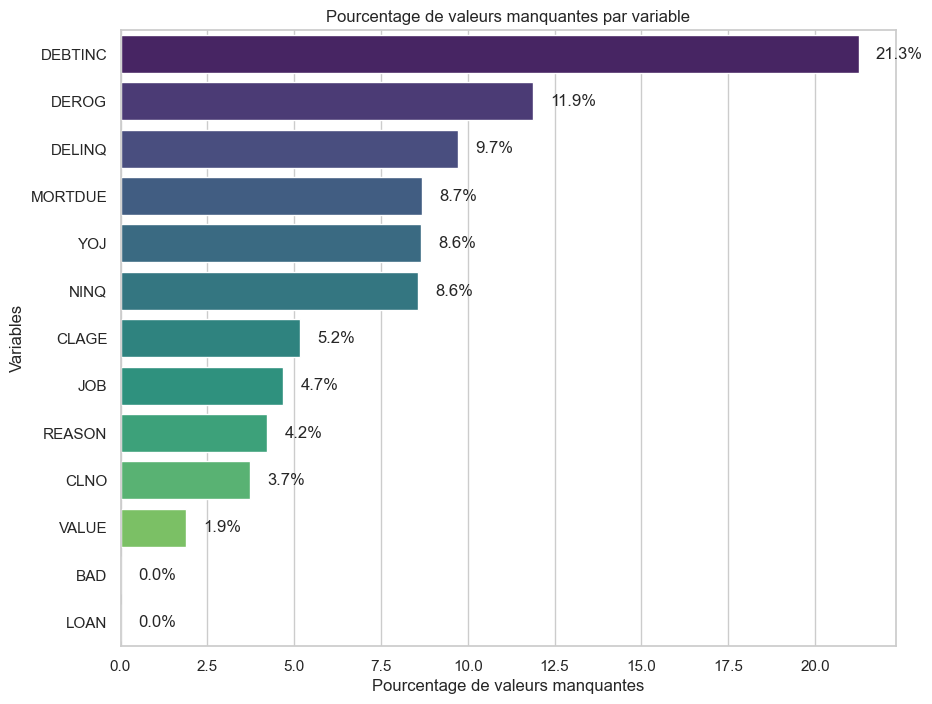

In [87]:
plt.figure(figsize=(10, 8))  # Ajustez la taille selon vos besoins
barplot = sns.barplot(x='pct_val_manq', y='variable', data=val_manq, palette='viridis')

for p in barplot.patches:
    width = p.get_width()   
    plt.text(x=width + 0.5, y=p.get_y() + p.get_height() / 2, s='{:.1f}%'.format(width), va='center')  

plt.title('Pourcentage de valeurs manquantes par variable')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.ylabel('Variables')

plt.show()

C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\4076210954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=bad_freq.index, y=bad_freq.values, palette='viridis')


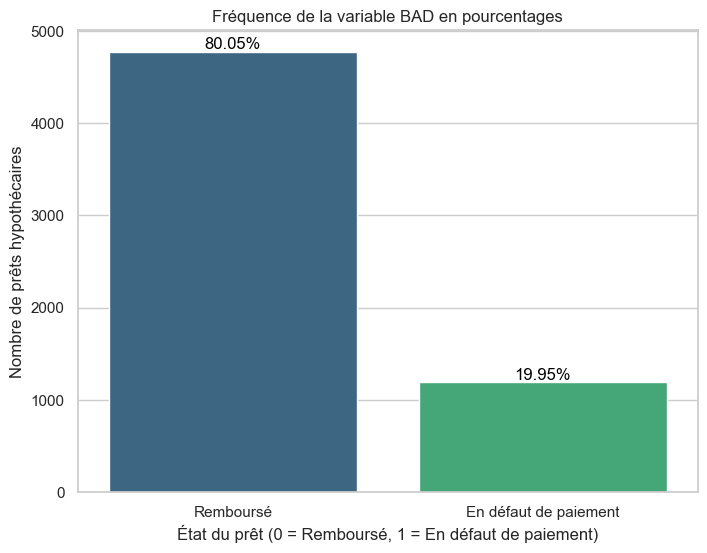

In [88]:
bad_freq = df_hmeq['BAD'].value_counts().sort_index()
total = bad_freq.sum()
percentages = (bad_freq / total * 100).round(2)
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=bad_freq.index, y=bad_freq.values, palette='viridis')

for index, value in enumerate(bad_freq):
    plt.text(index, value, f'{percentages[index]}%', color='black', ha='center', va='bottom')

plt.title('Fréquence de la variable BAD en pourcentages')
plt.xlabel('État du prêt (0 = Remboursé, 1 = En défaut de paiement)')
plt.ylabel('Nombre de prêts hypothécaires')
plt.xticks([0, 1], ['Remboursé', 'En défaut de paiement'])  

plt.show()

<strong style="color: white;">Les variables comportant des valeurs manquantes sont :</strong>
<ul style="color: white;">
  <li>DEBTINC (21%)</li>
  <li>DEROG (12%)</li>
  <li>DELINQ (10%)</li>
  <li>MORTDUE (9%)</li>
  <li>YOJ (9%)</li>
  <li>NINQ (9%)</li>
  <li>CLAGE (5%)</li>
  <li>JOB (5%)</li>
  <li>REASON (4%)</li>
  <li>CLNO (4%)</li>
  <li>VALUE (2%)</li> 
</ul>

Selon Rubin, on distingue 3 types de données manquantes :
-les MCAR
-les MAR
-les MNAR


<strong style="color: blue; font-size: 24px;">VISUALISATION GRAPHIQUE</strong>

C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\184223218.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_hmeq, x=var, palette='Set1', ax=axes[len(num_vars) + i])
C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\184223218.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_hmeq, x=var, palette='Set1', ax=axes[len(num_vars) + i])
C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\184223218.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_hmeq, x=var, palette='Set1', ax=axes[len(num_vars) +

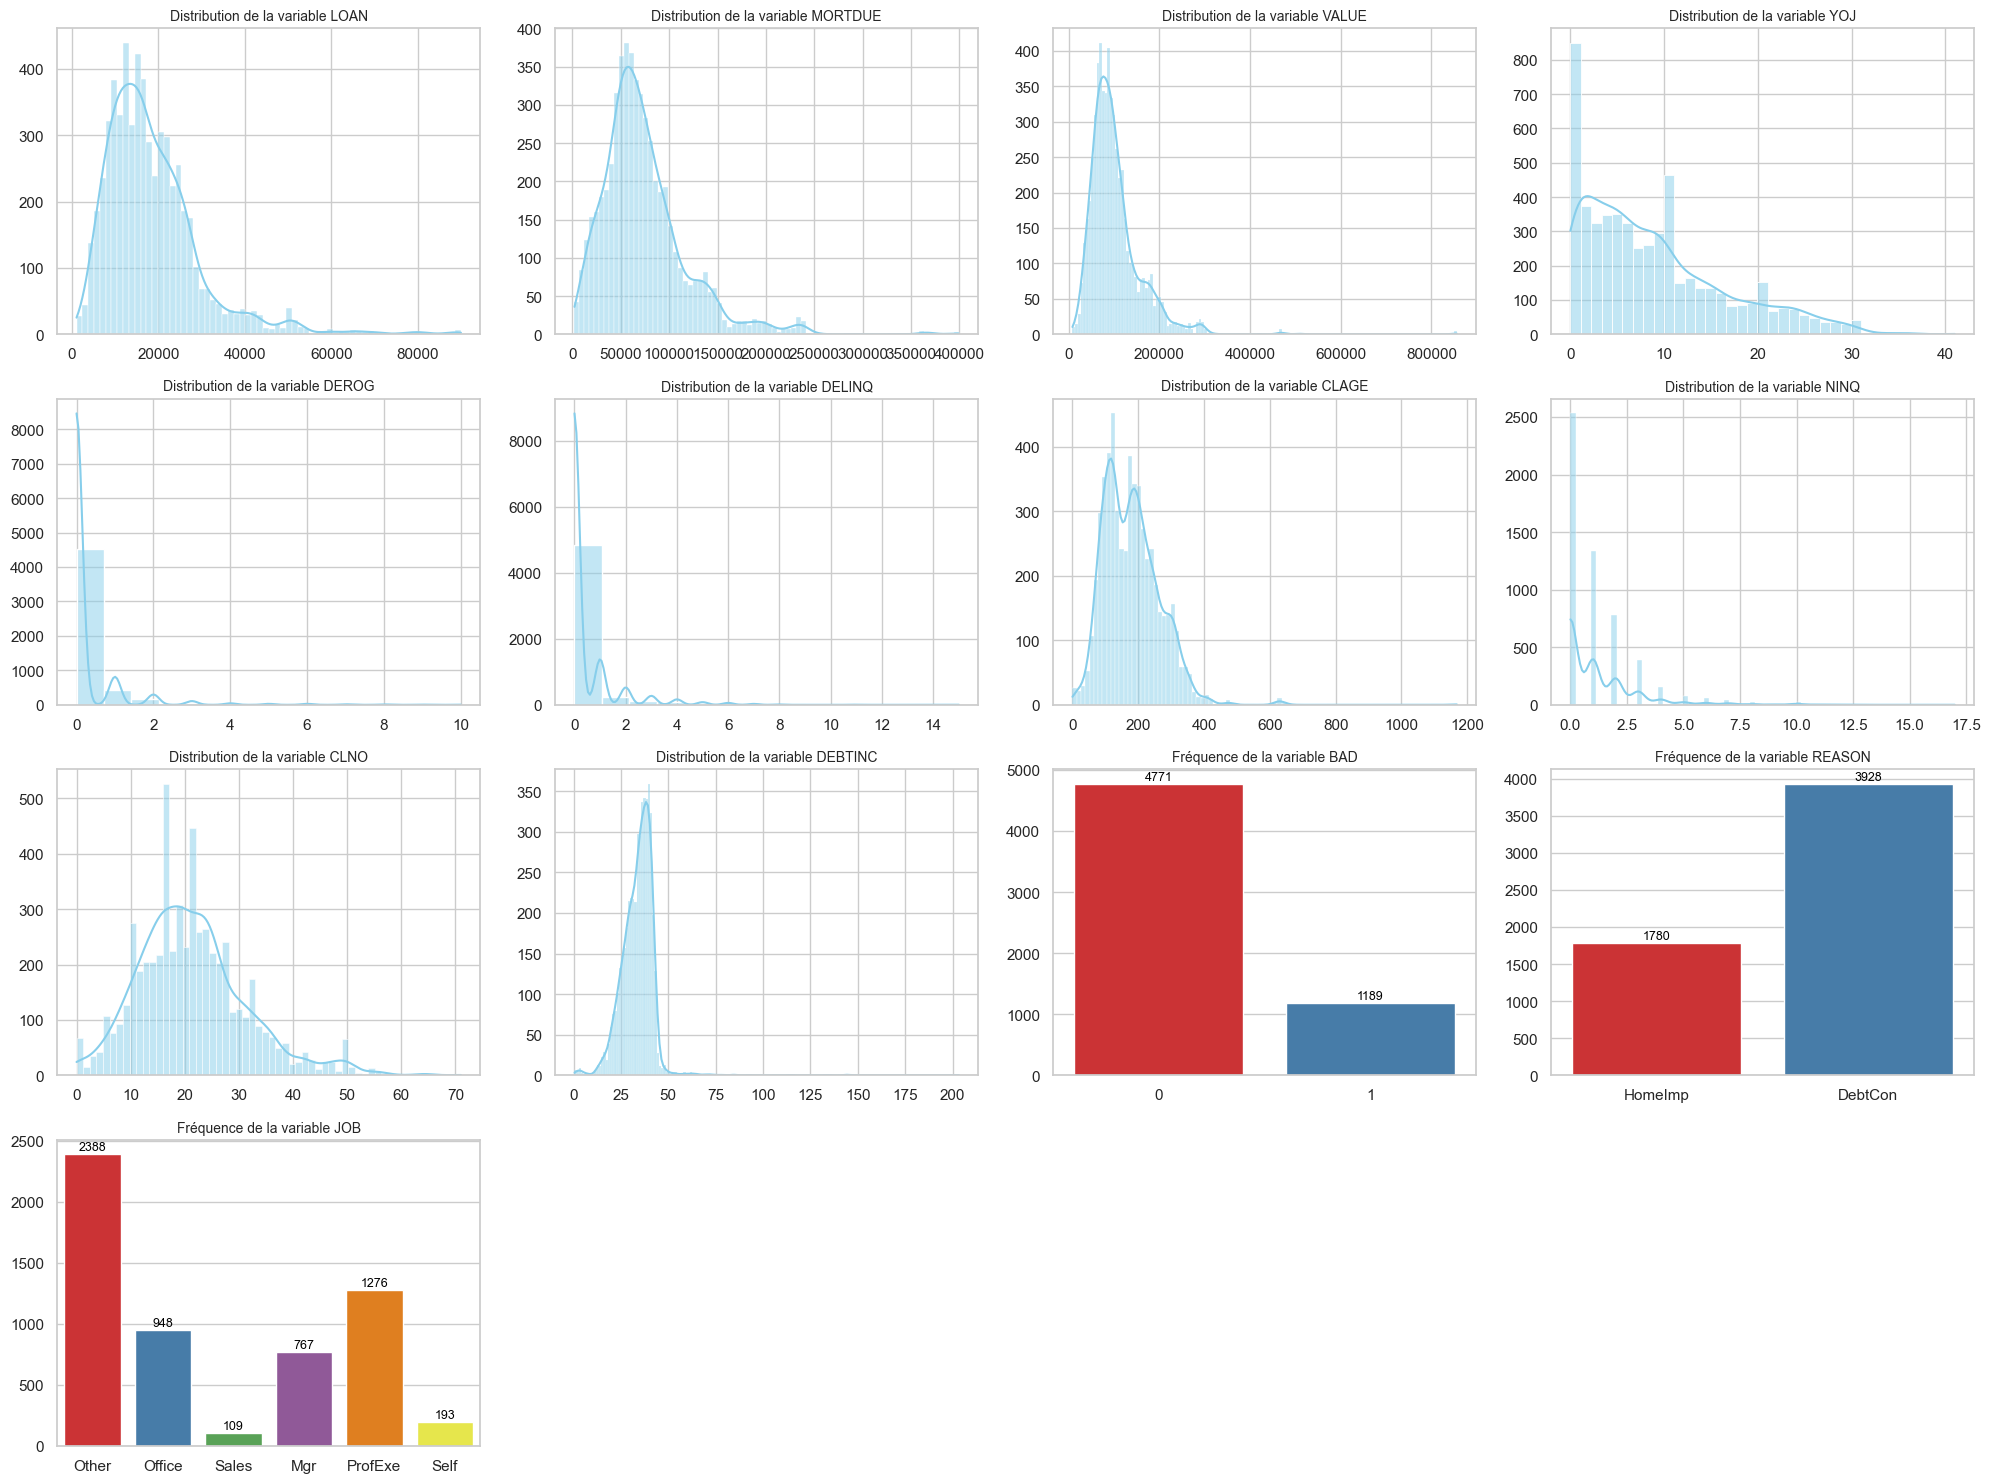

In [89]:
# Variables numériques et catégorielles
num_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
cat_vars = ['BAD', 'REASON', 'JOB']

rows, cols = 4, 4  
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  


for i, var in enumerate(num_vars):
    sns.histplot(data=df_hmeq, x=var, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution de la variable {var}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i, var in enumerate(cat_vars): 
    ax = sns.countplot(data=df_hmeq, x=var, palette='Set1', ax=axes[len(num_vars) + i])
    ax.set_title(f'Fréquence de la variable {var}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Ajouter les annotations sur chaque barre
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

for i in range(len(num_vars) + len(cat_vars), rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [90]:
df_hmeq.duplicated().sum()

0

<strong style="color: blue; font-size: 24px;">OUTLIERS ET TRAITEMENT</strong>

In [91]:
# Variables numériques
col_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Fonction pour appliquer le test de Shapiro-Wilk à chaque variable numérique
shapiro_results = {}
for column in col_num:
    stat, p_value = shapiro(df_hmeq[column].dropna())
    shapiro_results[column] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Affichage des résultats
shapiro_df = pd.DataFrame(shapiro_results).T
print(shapiro_df)

         Shapiro-Wilk Statistic       p-value
LOAN                   0.851939  1.696736e-59
MORTDUE                0.880218  6.993036e-54
VALUE                  0.809998  7.559306e-64
YOJ                    0.907764  2.253118e-49
DEROG                  0.336008  1.199307e-87
DELINQ                 0.457799  1.041071e-83
CLAGE                  0.934599  2.307855e-44
NINQ                   0.690951  5.119097e-72
CLNO                   0.966530  1.570316e-34
DEBTINC                0.827151  1.319040e-57


c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5960.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5442.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5848.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5445.
  res = hypotest_fun_out(*sampl

In [92]:
ks_results = {}
for column in col_num:
    stat, p_value = kstest(df_hmeq[column].dropna(), 'norm')
    ks_results[column] = {'K-S Statistic': stat, 'p-value': p_value}

ks_df = pd.DataFrame(ks_results).T
print(ks_df)

         K-S Statistic  p-value
LOAN          1.000000      0.0
MORTDUE       1.000000      0.0
VALUE         1.000000      0.0
YOJ           0.816368      0.0
DEROG         0.500000      0.0
DELINQ        0.500000      0.0
CLAGE         0.998756      0.0
NINQ          0.500000      0.0
CLNO          0.984185      0.0
DEBTINC       0.996470      0.0


In [93]:
from scipy.stats import jarque_bera

# Variables numériques
col_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Fonction pour appliquer le test de Jarque-Bera à chaque variable numérique
jarque_bera_results = {}
for column in col_num:
    stat, p_value = jarque_bera(df_hmeq[column].dropna())
    jarque_bera_results[column] = {'Jarque-Bera Statistic': stat, 'p-value': p_value}

# Affichage des résultats
jarque_bera_df = pd.DataFrame(jarque_bera_results).T
print(jarque_bera_df)

         Jarque-Bera Statistic        p-value
LOAN              15977.960149   0.000000e+00
MORTDUE           12490.584374   0.000000e+00
VALUE            153450.193946   0.000000e+00
YOJ                 917.352289  6.302044e-200
DEROG            321709.438935   0.000000e+00
DELINQ           138748.683471   0.000000e+00
CLAGE             15272.201886   0.000000e+00
NINQ              27945.478936   0.000000e+00
CLNO                893.459043  9.723754e-195
DEBTINC          504032.424552   0.000000e+00


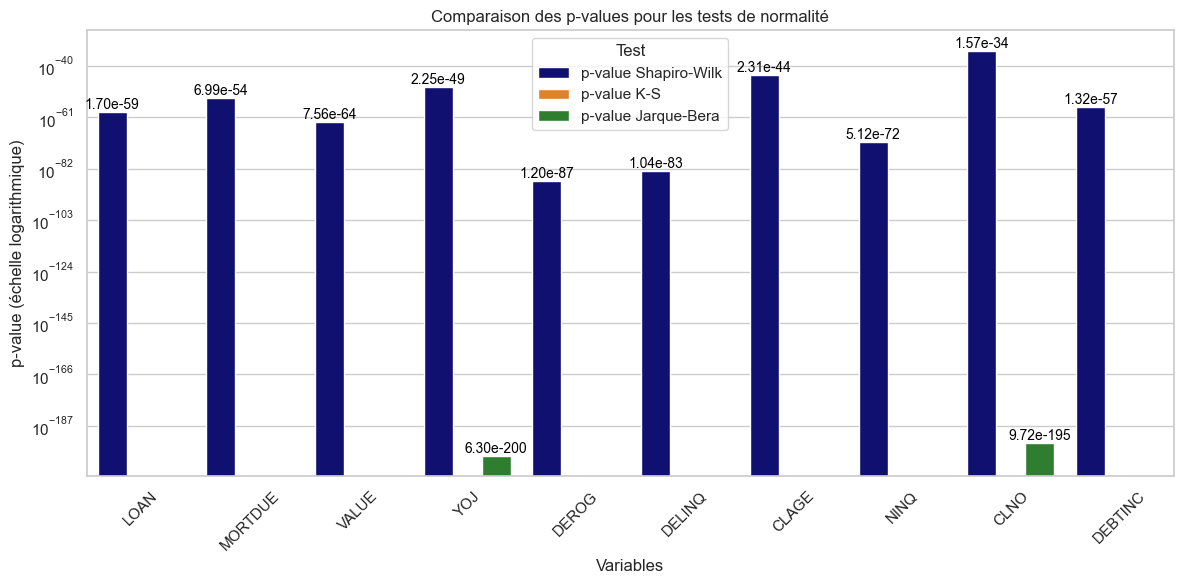

In [94]:
palette_colors = ["#000080", "#ff7f0e", "#228B22"]  # Bleu, orange, vert

results = {
    'Variables': ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
    'p-value Shapiro-Wilk': [1.696736e-59, 6.993036e-54, 7.559306e-64, 2.253118e-49, 1.199307e-87, 1.041071e-83, 2.307855e-44, 5.119097e-72, 1.570316e-34, 1.319040e-57],
    'p-value K-S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'p-value Jarque-Bera': [0.0, 0.0, 0.0, 6.302044e-200, 0.0, 0.0, 0.0, 0.0, 9.723754e-195, 0.0]  # Ajoute tes valeurs réelles ici
}

# Convertir ce dictionnaire en DataFrame pour une manipulation facile
df_results = pd.DataFrame(results)

# Transformer le DataFrame pour un affichage en barplot
df_melted = df_results.melt(id_vars="Variables", var_name="Test", value_name="p-value")

# Création du graphique
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x="Variables", y="p-value", hue="Test", data=df_melted, palette=palette_colors)

# Ajouter des annotations pour les p-values au-dessus des barres
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Afficher les valeurs seulement si elles sont > 0
        plt.text(
            p.get_x() + p.get_width() / 2,  # Positionnement en X
            height,  # Positionnement en Y
            f'{height:.2e}',  # Valeur à afficher, formatée en notation scientifique
            ha="center", va="bottom", fontsize=10, color="black"
        )

# Configuration des titres, des labels et des échelles
plt.title("Comparaison des p-values pour les tests de normalité")
plt.xlabel("Variables")
plt.ylabel("p-value (échelle logarithmique)")
plt.yscale('log')  # Utilisation d'une échelle logarithmique
plt.legend(title="Test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Variable: MORTDUE
Lower bound: -21542.0, Upper bound: 159306.0
Number of outliers: 234

Variable: VALUE
Lower bound: -14547.625, Upper bound: 200447.375
Number of outliers: 320

Variable: YOJ
Lower bound: -12.0, Upper bound: 28.0
Number of outliers: 91

Variable: DEROG
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 725

Variable: DELINQ
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 1201

Variable: CLAGE
Lower bound: -59.551661634999974, Upper bound: 406.23064200499994
Number of outliers: 47

Variable: NINQ
Lower bound: -3.0, Upper bound: 5.0
Number of outliers: 177

Variable: CLNO
Lower bound: -1.5, Upper bound: 42.5
Number of outliers: 219

Variable: DEBTINC
Lower bound: 14.345367488000003, Upper bound: 53.79780451199999
Number of outliers: 94



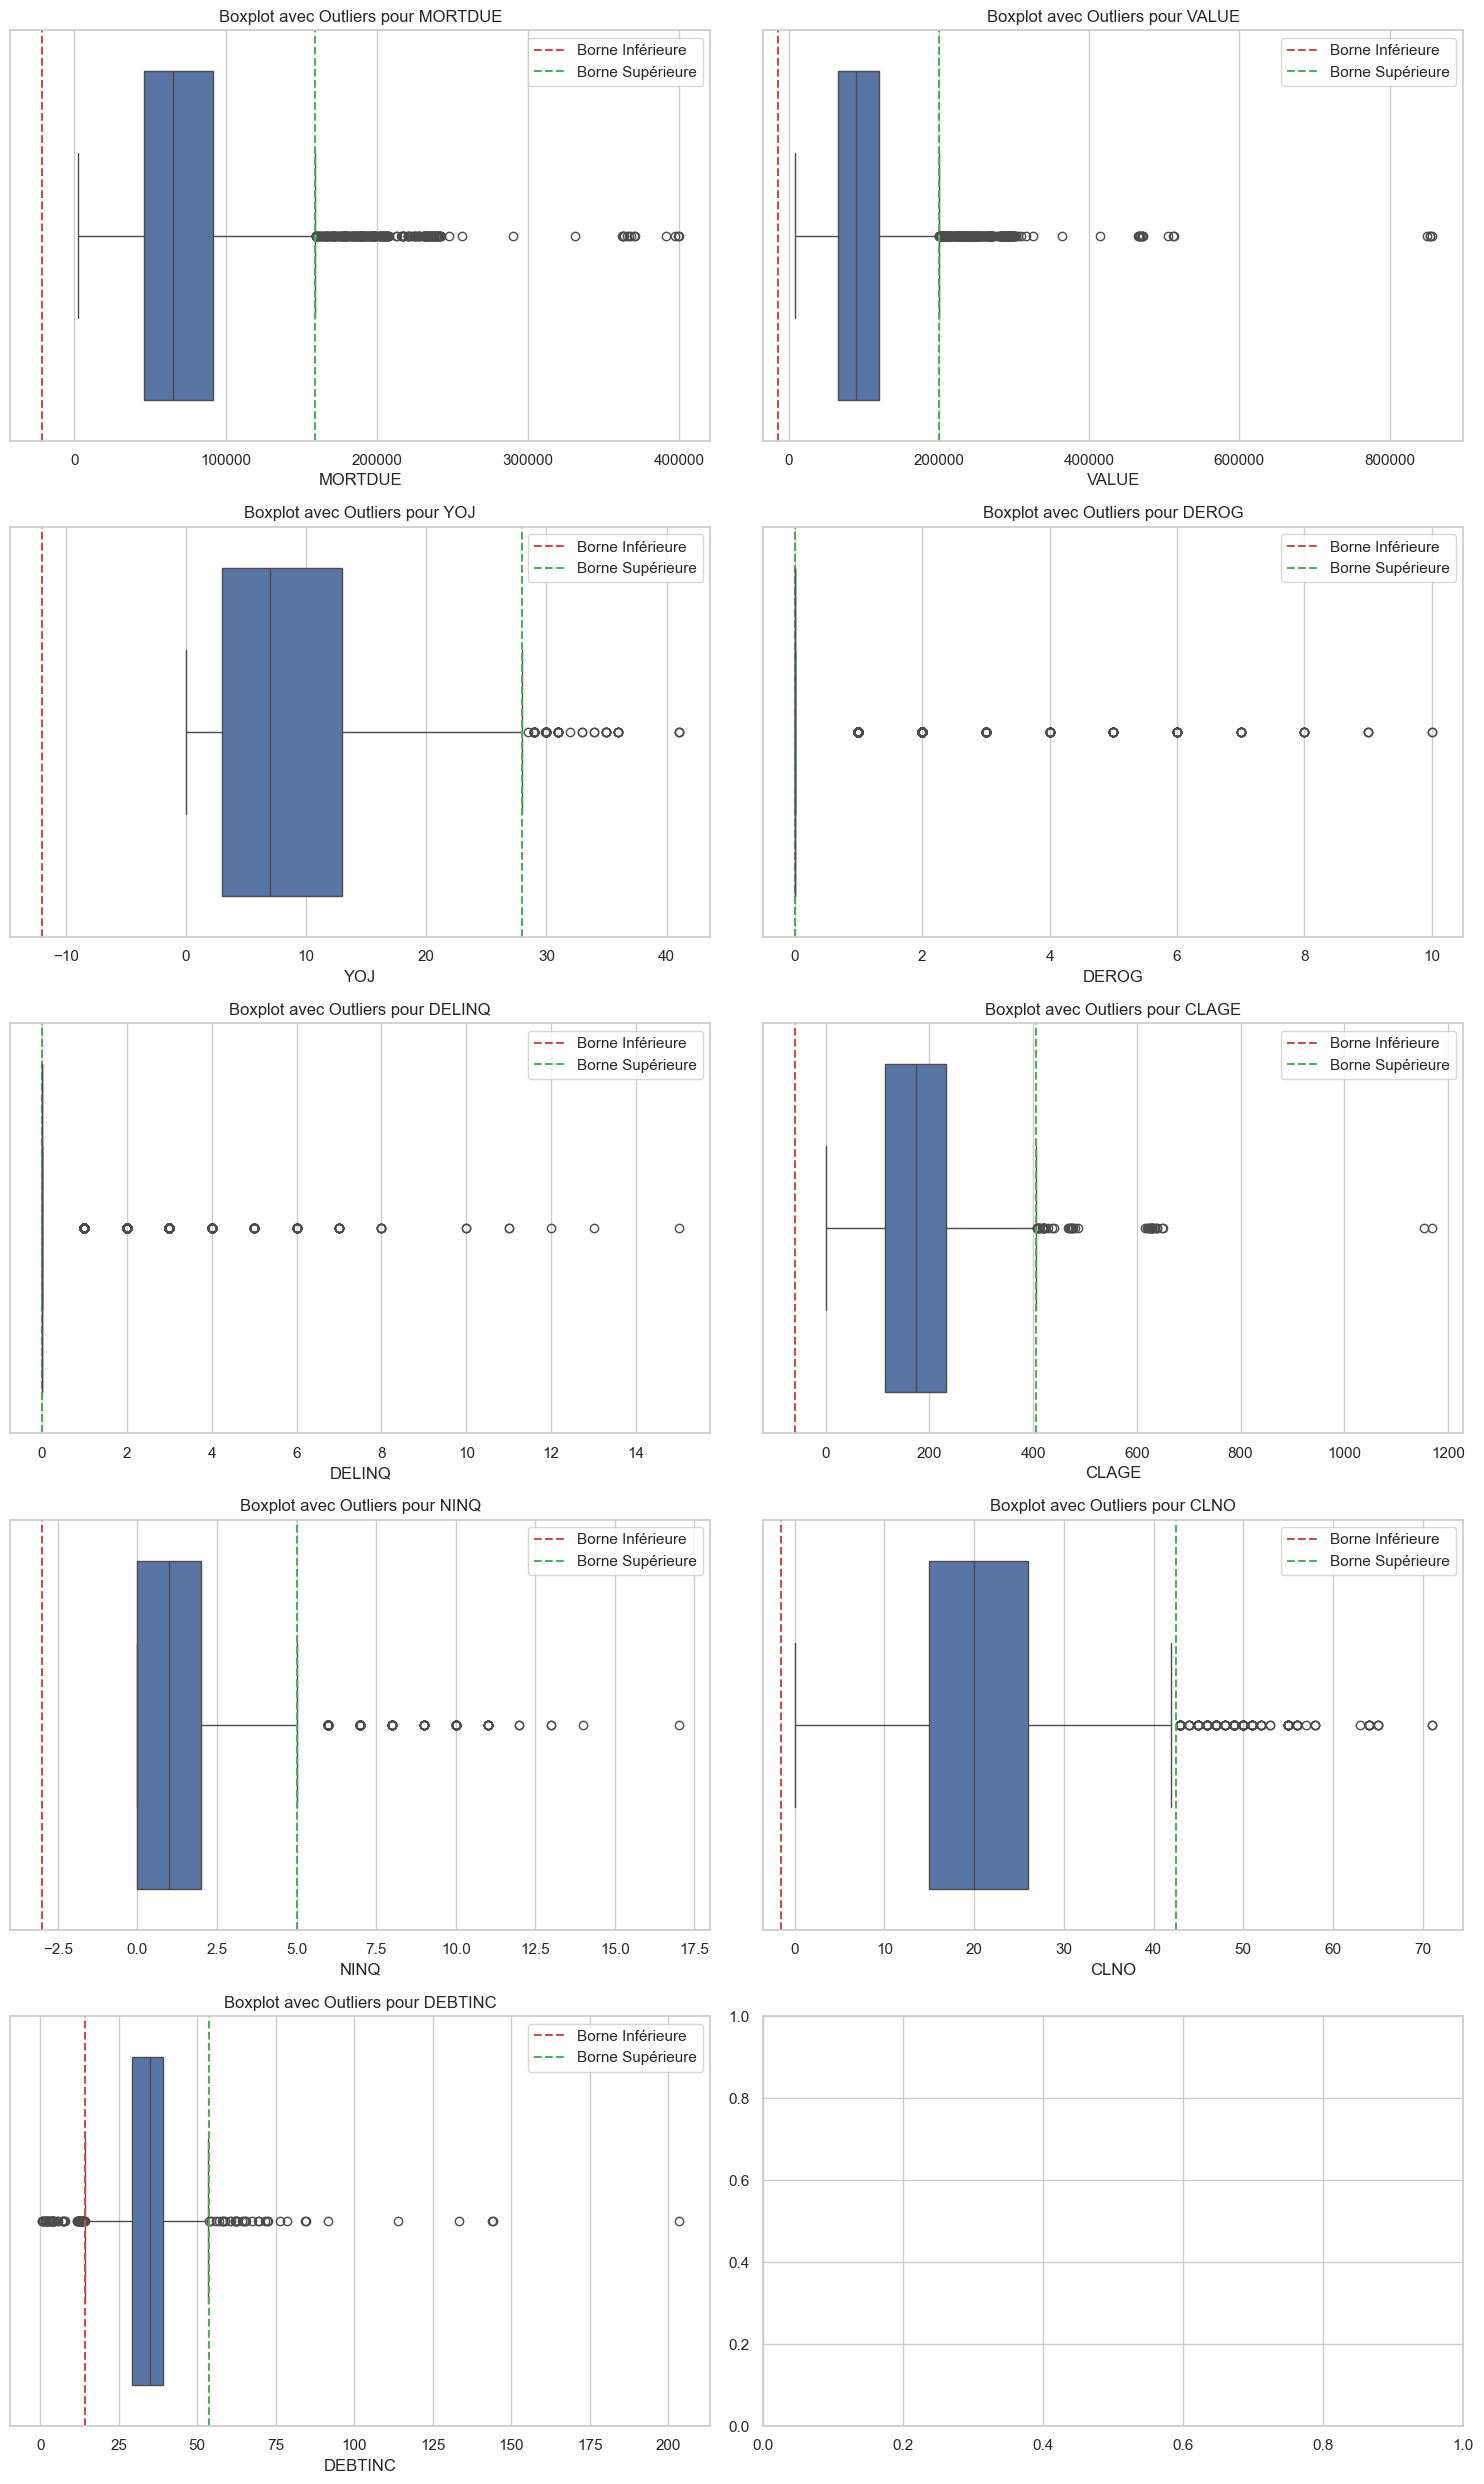

In [95]:
# Fonction pour détecter les outliers selon l'IQR et tracer les boxplots dans des subplots
def detect_and_plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    num_columns = len(numeric_columns)
    
    # Déterminer le nombre de lignes et de colonnes pour les subplots
    num_rows = int(np.ceil(num_columns / 2))  # Par exemple 2 colonnes par ligne
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
    
    outliers_df = pd.DataFrame()

    for i, column in enumerate(numeric_columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Identifier les outliers pour chaque colonne
        outlier_condition = (df[column] < borne_inf) | (df[column] > borne_sup)
        outliers_in_column = df.loc[outlier_condition, column]
        outliers_df[column] = pd.Series(outliers_in_column)

        # Tracer le boxplot dans un subplot
        row = i // 2
        col = i % 2
        sns.boxplot(ax=axes[row, col], x=df[column])
        axes[row, col].set_title(f'Boxplot avec Outliers pour {column}')
        axes[row, col].axvline(x=borne_inf, color='r', linestyle='--', label='Borne Inférieure')
        axes[row, col].axvline(x=borne_sup, color='g', linestyle='--', label='Borne Supérieure')
        axes[row, col].legend()

        # Afficher les bornes et le nombre d'outliers
        print(f'Variable: {column}')
        print(f'Lower bound: {borne_inf}, Upper bound: {borne_sup}')
        print(f'Number of outliers: {outlier_condition.sum()}')
        print('')
    
    plt.tight_layout()  # Ajuster l'espacement entre les sous-graphiques
    plt.show()

    return outliers_df

# Appliquer la fonction à ton DataFrame df_hmeq
outliers_detected = detect_and_plot_outliers(df_hmeq)

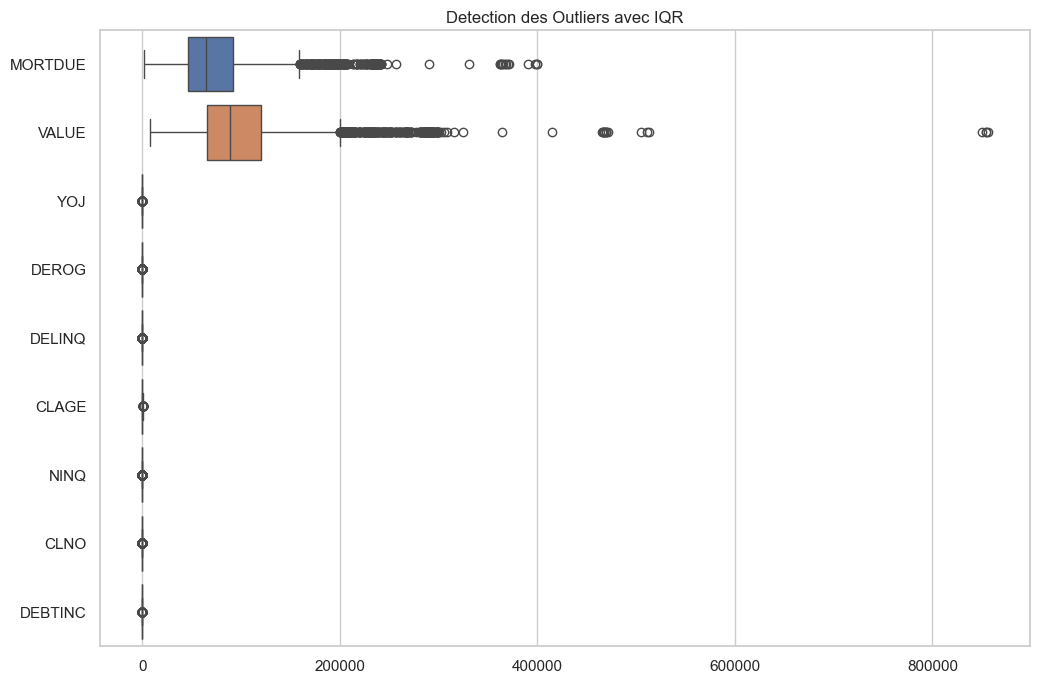

In [96]:
# Fonction pour détecter les outliers selon l'IQR
def detect_outliers_iqr(df):
    outliers_df = pd.DataFrame()
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Identifier les outliers pour chaque colonne
        outlier_condition = (df[column] < borne_inf) | (df[column] > borne_sup)
        outliers_in_column = df.loc[outlier_condition, column]
        
        # Ajouter les outliers à un DataFrame pour affichage
        outliers_df = pd.concat([outliers_df, outliers_in_column.to_frame(name=column)], axis=1)
        
    return outliers_df

# Appliquer la fonction à ton DataFrame df_hmeq

outliers_detected = detect_outliers_iqr(df_hmeq)

# Tracer les boxplots pour chaque variable numérique
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_hmeq.select_dtypes(include=['float64']), orient="h")
plt.title('Detection des Outliers avec IQR')
plt.show()

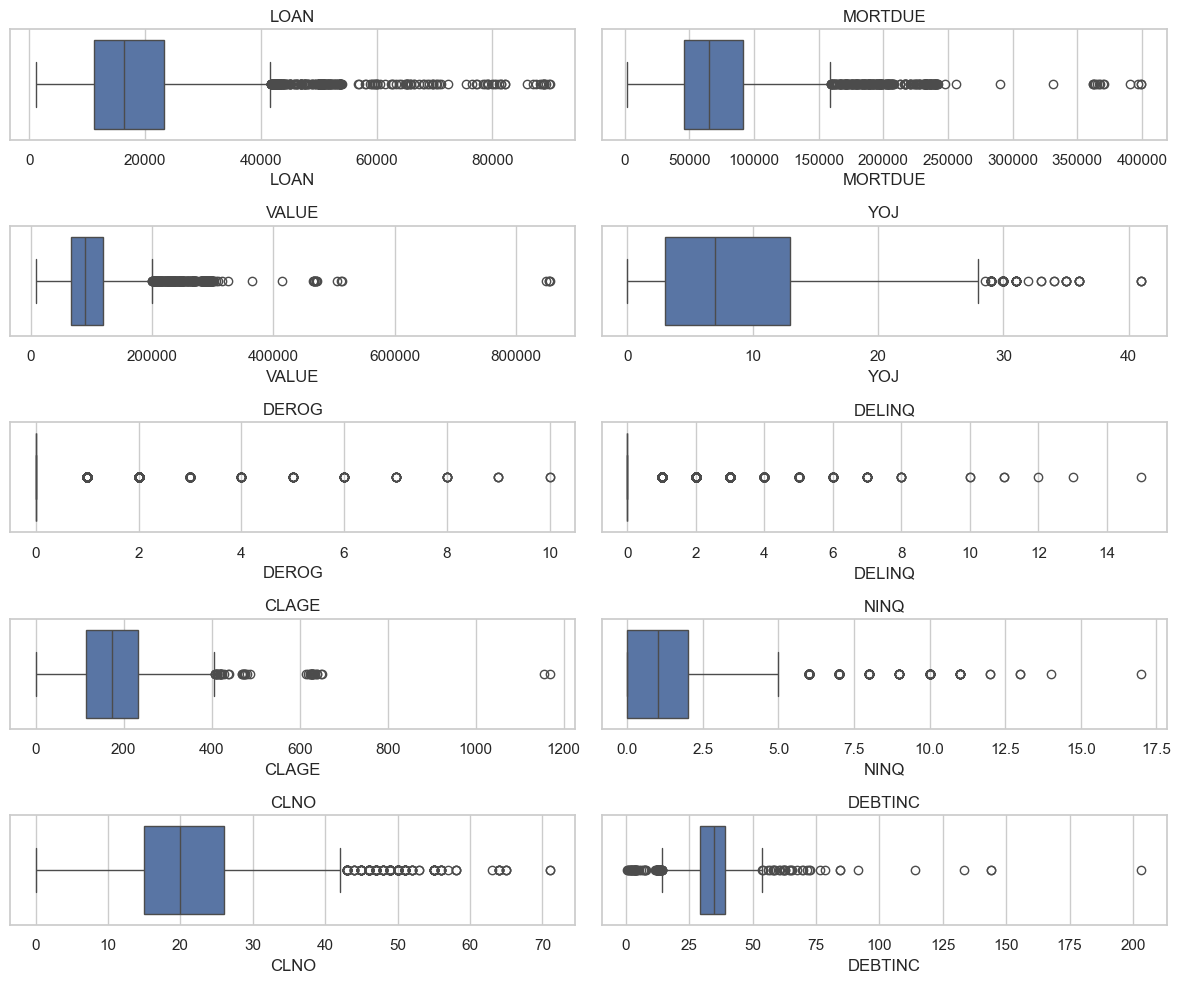

In [97]:
# Liste des variables continues ayant des valeurs manquantes
vars_to_test = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

plt.figure(figsize=(12, 10))
for i, var in enumerate(vars_to_test):
    plt.subplot(5, 2, i+1)  
    sns.boxplot(x=df_hmeq[var])
    plt.title(var)
plt.tight_layout()
plt.show()

C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\3083147077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')


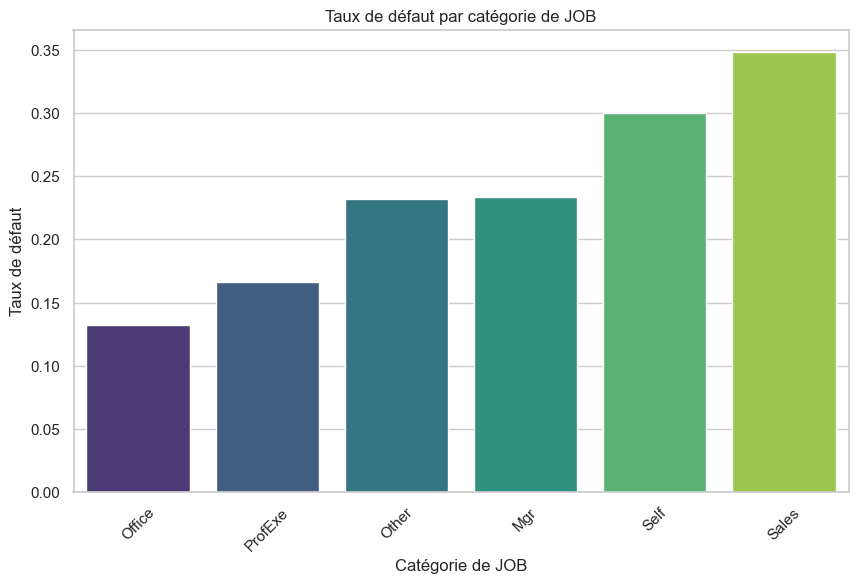

In [98]:
# Supposons que 'default_rates' contient les taux de défaut par job, calculés comme précédemment
default_rates = df_hmeq.groupby('JOB')['BAD'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.title('Taux de défaut par catégorie de JOB')
plt.ylabel('Taux de défaut')
plt.xlabel('Catégorie de JOB')
plt.xticks(rotation=45)
plt.show()

In [99]:
# Modifier la fonction de mapping pour gérer les valeurs NaN
def map_job_categories(job):
    if job in ['Office', 'ProfExe']:
        return 'Office and Professional'
    elif job in ['Other', 'Mgr']:
        return 'Management and other'
    elif job in ['Self', 'Sales']:
        return 'Self-Employed and Sales'
    return np.nan  # Retourner NaN pour les valeurs inconnues ou manquantes

# Appliquer la fonction de mapping à la colonne JOB et créer une nouvelle colonne
df_hmeq['JOB_GROUP'] = df_hmeq['JOB'].map(map_job_categories)

# Afficher les premières lignes pour vérifier le résultat
print(df_hmeq[['JOB', 'JOB_GROUP']].head())


      JOB                JOB_GROUP
0   Other     Management and other
1   Other     Management and other
2   Other     Management and other
3     NaN                      NaN
4  Office  Office and Professional


In [100]:
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_GROUP
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,Management and other
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,Management and other
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,Management and other
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,Office and Professional


C:\Users\dumas\AppData\Local\Temp\ipykernel_2684\1011489904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates_mapping.index, y=default_rates_mapping.values, palette='viridis')


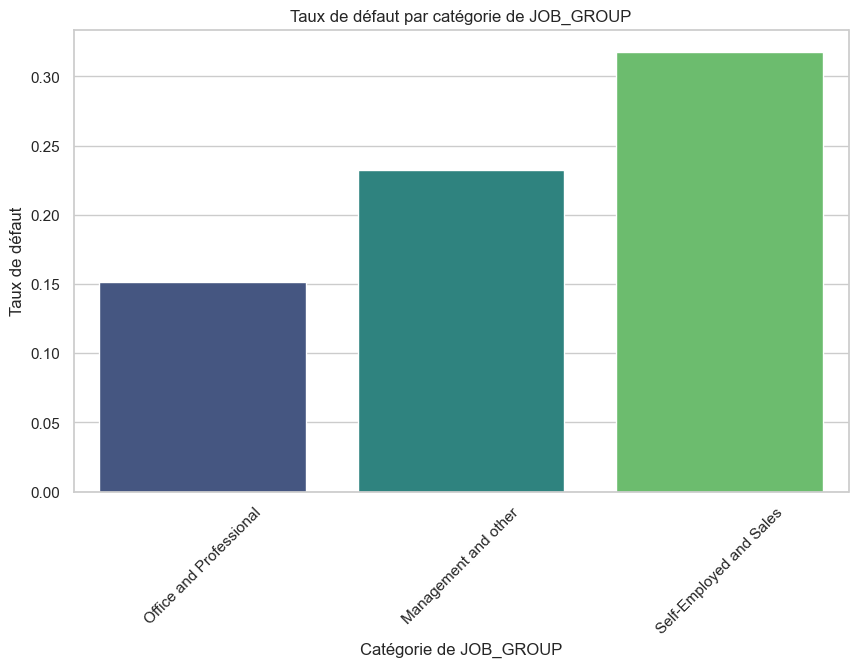

In [101]:
default_rates_mapping = df_hmeq.groupby('JOB_GROUP')['BAD'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates_mapping.index, y=default_rates_mapping.values, palette='viridis')
plt.title('Taux de défaut par catégorie de JOB_GROUP')
plt.ylabel('Taux de défaut')
plt.xlabel('Catégorie de JOB_GROUP')
plt.xticks(rotation=45)
plt.show()

<strong style="color: blue; font-size: 24px;">GESTION DES VALEURS MANQUANTES</strong>

In [102]:
# Préparation pour le split
X = df_hmeq.drop(['JOB'], axis=1)  # Supprime 'BAD' et 'JOB' avant le split
y = df_hmeq['BAD']

# Split en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Copie pour manipulations ultérieures
hmeq_train = X_train.copy()
hmeq_test = X_test.copy()

bad_train = hmeq_train['BAD']
bad_test = hmeq_test['BAD']

hmeq_train = hmeq_train.drop(['BAD'], axis=1)
hmeq_test = hmeq_test.drop(['BAD'], axis=1)


In [103]:
hmeq_train['DEBTINC_missing'] = hmeq_train['DEBTINC'].isnull().astype(int)
hmeq_test['DEBTINC_missing'] = hmeq_test['DEBTINC'].isnull().astype(int)

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputation par la mode pour les variables catégorielles (train et test)
mode_impute_cols = ['REASON', 'JOB_GROUP']
for col in mode_impute_cols:
    hmeq_train[col].fillna(hmeq_train[col].mode()[0], inplace=True)
    hmeq_test[col].fillna(hmeq_train[col].mode()[0], inplace=True)  # Utiliser la mode du train pour le test

median_impute_cols = ['DEBTINC', 'MORTDUE', 'VALUE']
hmeq_train[median_impute_cols] = hmeq_train[median_impute_cols].fillna(hmeq_train[median_impute_cols].median())
hmeq_test[median_impute_cols] = hmeq_test[median_impute_cols].fillna(hmeq_train[median_impute_cols].median())  # Appliquer la médiane du train

# Appliquer MICE sur les autres variables
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Liste des variables à imputer par MICE
mice_impute_cols = ['DEROG', 'DELINQ', 'YOJ', 'CLAGE', 'NINQ', 'CLNO']
hmeq_train[mice_impute_cols] = mice_imputer.fit_transform(hmeq_train[mice_impute_cols])
hmeq_test[mice_impute_cols] = mice_imputer.transform(hmeq_test[mice_impute_cols])  # Appliquer le modèle sur les données de test

# Vérification
print("Valeurs manquantes après imputation (train) :\n", hmeq_train.isnull().sum())
print("Valeurs manquantes après imputation (test) :\n", hmeq_test.isnull().sum())

Valeurs manquantes après imputation (train) :
 LOAN               0
MORTDUE            0
VALUE              0
REASON             0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
JOB_GROUP          0
DEBTINC_missing    0
dtype: int64
Valeurs manquantes après imputation (test) :
 LOAN               0
MORTDUE            0
VALUE              0
REASON             0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
JOB_GROUP          0
DEBTINC_missing    0
dtype: int64


In [105]:
# Encodage de 'JOB' et 'REASON' après toutes les imputations
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse_output=False)
hmeq_train_encoded = pd.DataFrame(encoder.fit_transform(hmeq_train[['JOB_GROUP', 'REASON']]),
                                  columns=encoder.get_feature_names_out(['JOB_GROUP', 'REASON']),
                                  index=hmeq_train.index)
hmeq_test_encoded = pd.DataFrame(encoder.transform(hmeq_test[['JOB_GROUP', 'REASON']]),
                                 columns=encoder.get_feature_names_out(['JOB_GROUP', 'REASON']),
                                 index=hmeq_test.index)

hmeq_train = hmeq_train.drop(['JOB_GROUP', 'REASON'], axis=1).join(hmeq_train_encoded)
hmeq_test = hmeq_test.drop(['JOB_GROUP', 'REASON'], axis=1).join(hmeq_test_encoded)

print("Dimensions du set d'entraînement après encodage :", hmeq_train.shape)
print("Dimensions du set de test après encodage :", hmeq_test.shape)

Dimensions du set d'entraînement après encodage : (4768, 14)
Dimensions du set de test après encodage : (1192, 14)


In [106]:
hmeq_train['LOAN_VALUE_ratio'] = hmeq_train['LOAN'] / (hmeq_train['VALUE'] + 1e-6)
hmeq_test['LOAN_VALUE_ratio'] = hmeq_test['LOAN'] / (hmeq_test['VALUE'] + 1e-6)

hmeq_train = hmeq_train.drop(['VALUE', 'LOAN'], axis=1)
hmeq_test = hmeq_test.drop(['VALUE', 'LOAN'], axis=1)

Matrice de corrélation de Pearson:
                                    MORTDUE       YOJ     DEROG    DELINQ  \
MORTDUE                            1.000000 -0.082595 -0.038342  0.004160   
YOJ                               -0.082595  1.000000 -0.062118  0.044090   
DEROG                             -0.038342 -0.062118  1.000000  0.231077   
DELINQ                             0.004160  0.044090  0.231077  1.000000   
CLAGE                              0.136742  0.211276 -0.081982  0.027406   
NINQ                               0.030711 -0.085820  0.202895  0.064394   
CLNO                               0.311252  0.029489  0.069889  0.170610   
DEBTINC                            0.125224 -0.044884  0.029037  0.033639   
DEBTINC_missing                   -0.067561 -0.015117  0.176496  0.223218   
JOB_GROUP_Office and Professional  0.178161 -0.040932 -0.067462 -0.009771   
JOB_GROUP_Self-Employed and Sales  0.115120 -0.053722  0.016956 -0.005730   
REASON_HomeImp                    -0.0225

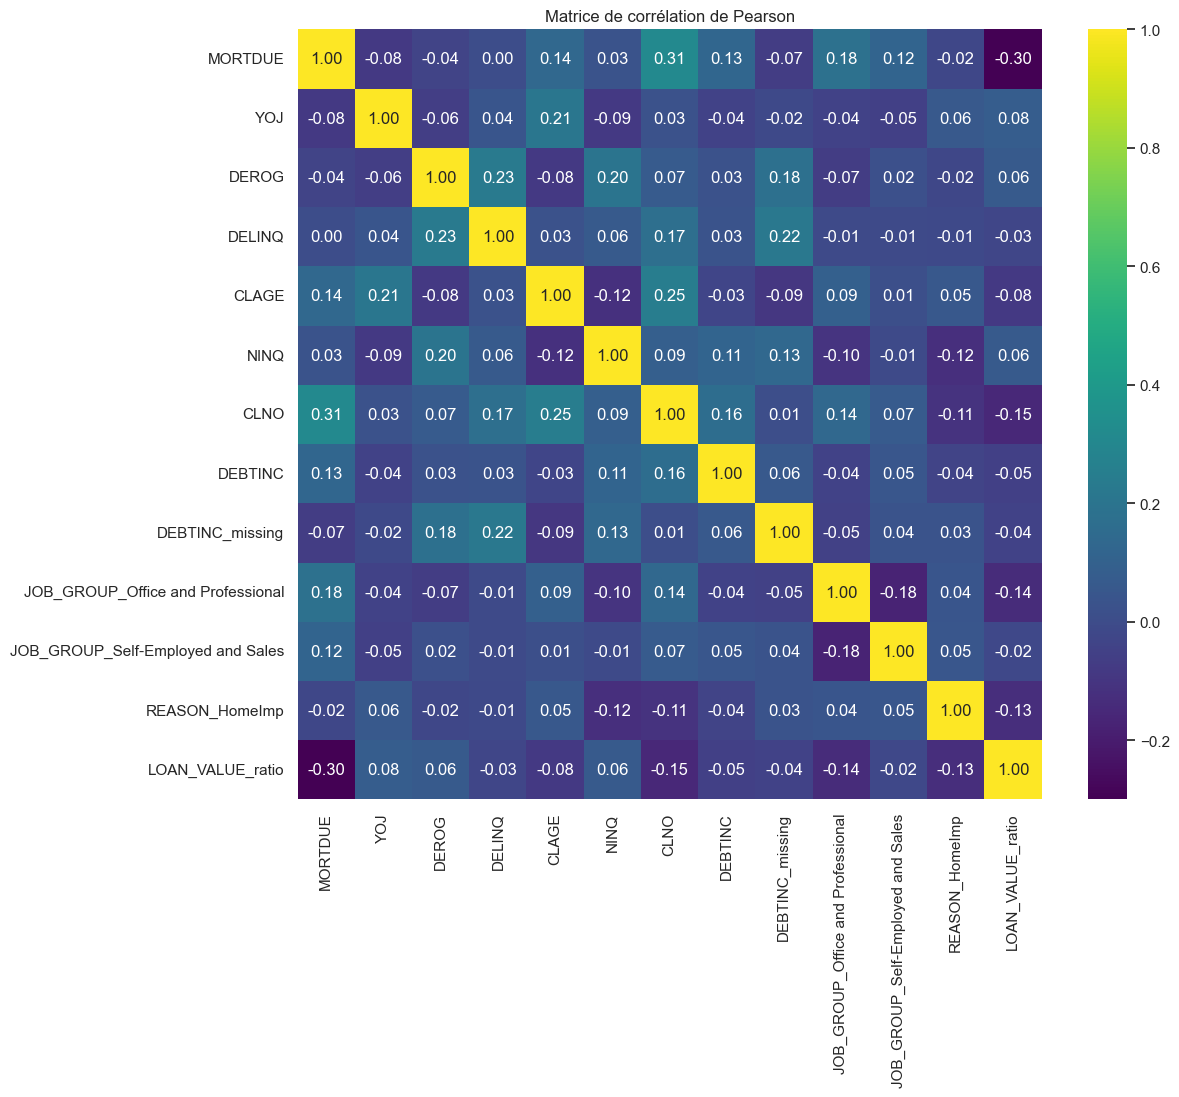

In [107]:
# Calcul de la matrice de corrélation de Pearson
pearson_corr = hmeq_train.corr(method='pearson')
print("Matrice de corrélation de Pearson:")
print(pearson_corr)

# Visualisation de la matrice de corrélation de Pearson
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='viridis')
plt.title('Matrice de corrélation de Pearson')
plt.show()



In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ajouter une constante pour éviter les erreurs lors du calcul du VIF
hmeq_train_with_const = sm.add_constant(hmeq_train)

# Calcul du VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data["Variable"] = hmeq_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(hmeq_train_with_const.values, i) for i in range(hmeq_train_with_const.shape[1])]

# Affichage des résultats
print(vif_data)

                             Variable        VIF
0                               const  36.091822
1                             MORTDUE   1.263457
2                                 YOJ   1.086317
3                               DEROG   1.128230
4                              DELINQ   1.131905
5                               CLAGE   1.163563
6                                NINQ   1.115964
7                                CLNO   1.278085
8                             DEBTINC   1.055704
9                     DEBTINC_missing   1.106825
10  JOB_GROUP_Office and Professional   1.123248
11  JOB_GROUP_Self-Employed and Sales   1.072585
12                     REASON_HomeImp   1.063831
13                   LOAN_VALUE_ratio   1.159658


## RANDOM FOREST

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [110]:
hmeq_train.head()

,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio
609,70451.00,3.0,0.00000,0.000000,141.268671,0.000000,31.0,31.681943,0,0.0,1.0,0.0,0.094061
4015,48735.00,8.0,0.00000,0.000000,48.498971,3.000000,10.0,32.921401,0,0.0,0.0,0.0,0.292912
1591,63136.00,3.0,0.42962,0.693767,149.064745,1.640548,35.0,28.975940,0,0.0,0.0,0.0,0.141802
1127,55342.00,7.0,0.67186,3.000000,111.998855,1.000000,11.0,39.870340,0,0.0,0.0,0.0,0.136822
920,47350.86,6.0,0.00000,1.000000,227.266667,0.000000,10.0,34.802429,1,1.0,0.0,0.0,0.085714


In [111]:
hmeq_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768 entries, 609 to 2
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MORTDUE                            4768 non-null   float64
 1   YOJ                                4768 non-null   float64
 2   DEROG                              4768 non-null   float64
 3   DELINQ                             4768 non-null   float64
 4   CLAGE                              4768 non-null   float64
 5   NINQ                               4768 non-null   float64
 6   CLNO                               4768 non-null   float64
 7   DEBTINC                            4768 non-null   float64
 8   DEBTINC_missing                    4768 non-null   int32  
 9   JOB_GROUP_Office and Professional  4768 non-null   float64
 10  JOB_GROUP_Self-Employed and Sales  4768 non-null   float64
 11  REASON_HomeImp                     4768 non-null   float6

In [112]:
hmeq_test.head()

,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio
4798,41314.0,19.0,0.0,0.0,183.631428,1.0,22.0,33.665534,0,1.0,0.0,0.0,0.351752
3716,33284.0,14.0,0.0,0.0,119.473073,1.0,17.0,37.784524,0,0.0,0.0,0.0,0.317029
1472,54641.0,5.0,0.0,0.0,323.192928,0.0,10.0,33.299628,0,0.0,0.0,0.0,0.167415
1050,45240.0,2.0,0.0,1.0,83.066751,0.0,19.0,38.454300,0,0.0,0.0,0.0,0.159638
87,58000.0,3.5,0.0,1.0,168.666667,0.0,18.0,34.802429,1,0.0,0.0,1.0,0.057604


In [113]:
hmeq_train['BAD'] = y_train
hmeq_test['BAD'] = y_test

### Entraînement et test du random forest

In [114]:
X_train = hmeq_train.drop("BAD", axis=1) 
y_train = hmeq_train['BAD'].astype('int')       

X_test = hmeq_test.drop("BAD", axis=1)  
y_test = hmeq_test['BAD'].astype('int')         


In [115]:
X_train

,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio
609,70451.00,3.0,0.00000,0.000000,141.268671,0.000000,31.0,31.681943,0,0.0,1.0,0.0,0.094061
4015,48735.00,8.0,0.00000,0.000000,48.498971,3.000000,10.0,32.921401,0,0.0,0.0,0.0,0.292912
1591,63136.00,3.0,0.42962,0.693767,149.064745,1.640548,35.0,28.975940,0,0.0,0.0,0.0,0.141802
1127,55342.00,7.0,0.67186,3.000000,111.998855,1.000000,11.0,39.870340,0,0.0,0.0,0.0,0.136822
920,47350.86,6.0,0.00000,1.000000,227.266667,0.000000,10.0,34.802429,1,1.0,0.0,0.0,0.085714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,68000.00,19.0,1.00000,1.000000,177.500000,5.000000,21.0,34.802429,1,1.0,0.0,0.0,0.131564
4301,51470.00,9.0,0.00000,0.000000,31.168696,2.000000,8.0,37.952180,0,0.0,0.0,0.0,0.328740
2821,65022.00,0.0,0.00000,0.000000,315.812632,1.000000,9.0,25.650384,0,0.0,0.0,1.0,0.357920
1167,147234.00,6.0,0.00000,0.000000,192.766667,1.000000,56.0,34.802429,1,1.0,0.0,1.0,0.057045


In [116]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred = model.predict(X_test) # prédiction sur l'ensemble de test

### Performances du random forest ( avec toutes les variables )

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[916  38]
 [ 81 157]]


In [119]:
from sklearn.metrics import classification_report

# Supposons que y_test et y_pred soient vos vraies étiquettes et prédictions
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       954
           1       0.81      0.66      0.73       238

    accuracy                           0.90      1192
   macro avg       0.86      0.81      0.83      1192
weighted avg       0.90      0.90      0.90      1192



### Importance de toutes les variables incluses et ROC-AUC

In [120]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=hmeq_test.drop('BAD', axis=1).columns).sort_values(ascending=False)

# Afficher les importances des caractéristiques
print("Importance des caractéristiques :")
print(feature_importances)

Importance des caractéristiques :
DEBTINC_missing                      0.189850
DEBTINC                              0.158394
CLAGE                                0.106277
DELINQ                               0.091943
MORTDUE                              0.086410
LOAN_VALUE_ratio                     0.084150
CLNO                                 0.081588
YOJ                                  0.066155
DEROG                                0.057908
NINQ                                 0.043459
REASON_HomeImp                       0.014261
JOB_GROUP_Office and Professional    0.012778
JOB_GROUP_Self-Employed and Sales    0.006826
dtype: float64


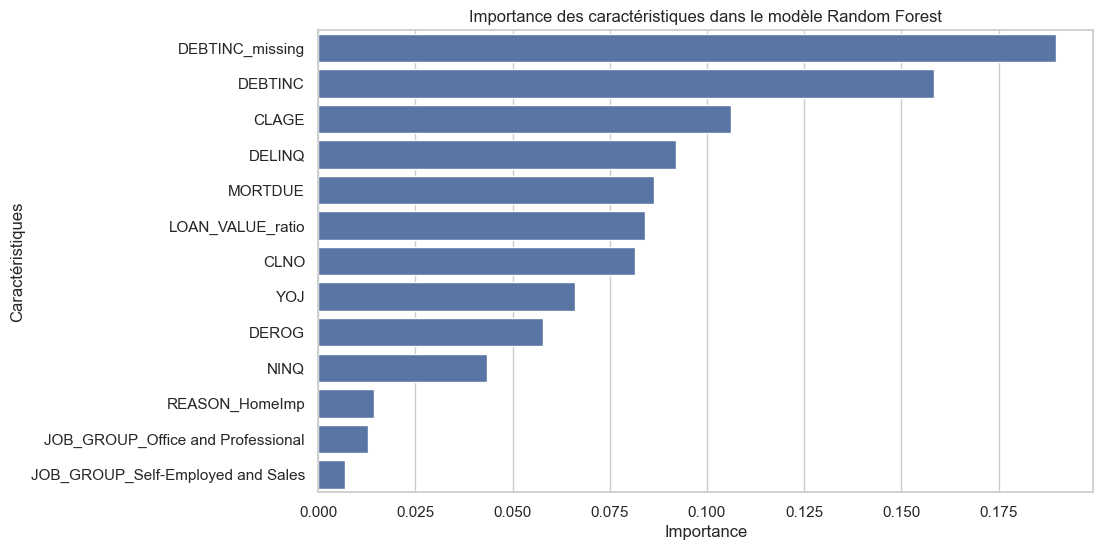

In [121]:
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Ajouter des labels et un titre
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques dans le modèle Random Forest')
plt.show()

In [122]:
np.sum(feature_importances)

0.9999999999999999

AUC: 0.9475274386484155


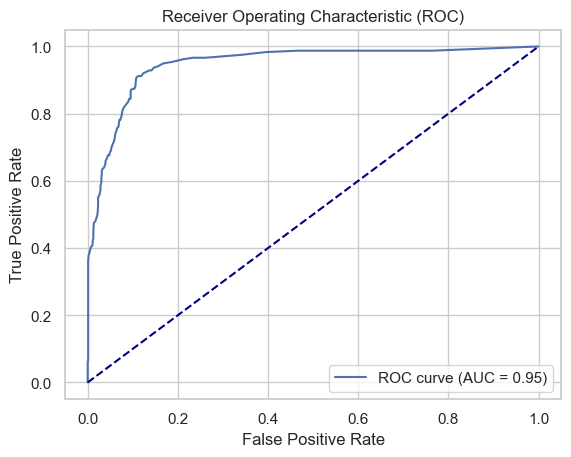

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve

# Obtenir les probabilités prédites pour la classe positive (1)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score}")

# Calcul des points pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Sélection des variables basées sur leurs importances et nouvel entraînement du modèle

In [124]:
columns_del = ["JOB_GROUP_Office and Professional","REASON_HomeImp","NINQ","JOB_GROUP_Self-Employed and Sales","BAD"]
X_train = hmeq_train.drop(columns_del, axis=1) 
y_train = hmeq_train['BAD'].astype('int')       

X_test = hmeq_test.drop(columns_del, axis=1)  
y_test = hmeq_test['BAD'].astype('int')          

In [125]:
X_train.columns

Index(['MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'CLNO', 'DEBTINC',
       'DEBTINC_missing', 'LOAN_VALUE_ratio'],
      dtype='object')

In [126]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
y_pred = model.predict(X_test) # prédiction sur l'ensemble de test

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[909  45]
 [ 84 154]]


In [129]:
# Supposons que y_test et y_pred soient vos vraies étiquettes et prédictions
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       954
           1       0.77      0.65      0.70       238

    accuracy                           0.89      1192
   macro avg       0.84      0.80      0.82      1192
weighted avg       0.89      0.89      0.89      1192



### Meilleurs hyparamètres 

In [130]:
from sklearn.model_selection import GridSearchCV


In [131]:
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [132]:
# Initialiser le modèle de Random Forest
rf = RandomForestClassifier(random_state=42,class_weight='balanced',oob_score=True)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Lancer la recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)


c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
262 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\sklearn\base.py", line 666, in 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [133]:
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Afficher la meilleure performance obtenue
print("Meilleure précision obtenue :", grid_search.best_score_)


Meilleurs hyperparamètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Meilleure précision obtenue : 0.8987023214784603


In [134]:
# Utiliser les meilleurs paramètres pour créer le modèle final
best_rf = grid_search.best_estimator_

# Faire des prédictions sur l'échantillon test
y_pred = best_rf.predict(X_test)

# Calculer et afficher les performances
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision : {accuracy:.2f}")

# Rapport de classification (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print(report)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)


Précision : 0.89
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       954
           1       0.76      0.64      0.70       238

    accuracy                           0.89      1192
   macro avg       0.84      0.80      0.81      1192
weighted avg       0.88      0.89      0.88      1192

Matrice de confusion :
 [[906  48]
 [ 85 153]]


AUC: 0.9377389320508077


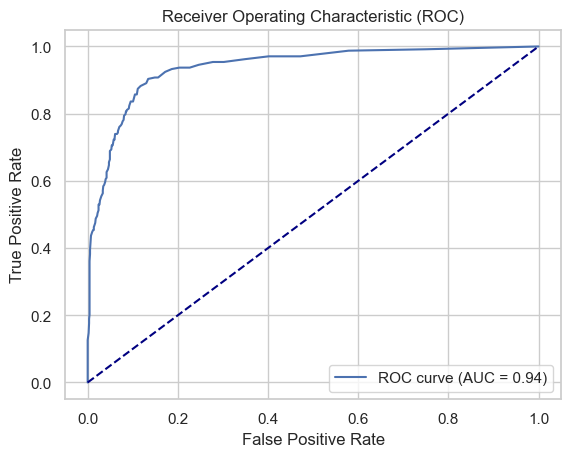

In [135]:
# Obtenir les probabilités prédites pour la classe positive (1)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score}")

# Calcul des points pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Grille de score 

Exactitude: 0.89
Précision: 0.77
Rappel: 0.65
Score F1: 0.70
AUC-ROC: 0.94


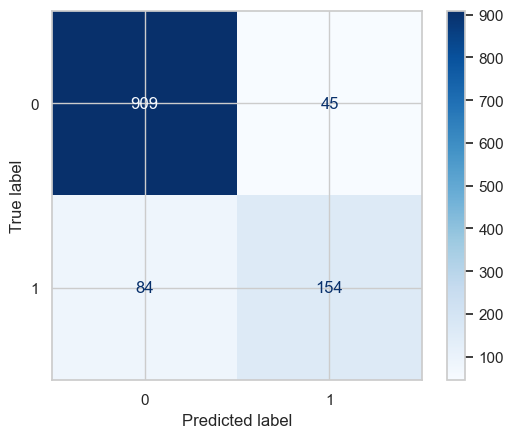

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score,ConfusionMatrixDisplay
# 1. Entraînement du modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Prédictions sur le jeu de test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Pour l'AUC-ROC

# 3. Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# 4. Afficher la grille de score
print(f"Exactitude: {accuracy:.2f}")
print(f"Précision: {precision:.2f}")
print(f"Rappel: {recall:.2f}")
print(f"Score F1: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.show()


In [137]:
# Fonction pour calculer le score
def scale_score(p):
    epsilon = 1e-10  # pour éviter la division par zéro
    p = max(p, epsilon)  # Définit p à epsilon si est très proche de 0

    factor = 25 / np.log(2)
    offset = 600 - factor * np.log(50)
    val = (1 - p) / p
    score = offset + factor * np.log(val)
    score = score + 150

    return round(max(0, min(score, 850)))

In [138]:
def scale_score_normalized(p, p_min=0.01, p_max=0.99):
    factor = 25 / np.log(2)
    offset = 750 - factor * np.log(50)

    val = p / (1 - p)
    score = offset + factor * np.log(val)

    val_min = (1 - p_min) / p_min
    val_max = (1 - p_max) / p_max

    score_min = offset + factor * np.log(val_min)
    score_max = offset + factor * np.log(val_max)

    normalized_score = 750 * (score - score_min) / (score_max - score_min)

    return round(max(0, min(normalized_score, 750)))

In [139]:
pred = best_rf.predict(X_test)
pred_prob_test = best_rf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

In [140]:
hmeq_test["Prob"] = pred_prob_test
hmeq_test["Score"] = hmeq_test["Prob"].apply(lambda x: scale_score(x))
hmeq_test["Score_Normalized"] = hmeq_test["Prob"].apply(lambda x: scale_score_normalized(x))

In [141]:
# 3. Ajouter la classe réelle dans le DataFrame de test pour comparaison
hmeq_test["BAD"] = y_test

In [142]:
# 4. Afficher la grille de score sous forme de tableau
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pred_prob_test)

print(f"{'Métrique':<20} {'Valeur':<10}")
print(f"{'Exactitude':<20} {accuracy:.2f}")
print(f"{'Précision':<20} {precision:.2f}")
print(f"{'Rappel':<20} {recall:.2f}")
print(f"{'Score F1':<20} {f1:.2f}")
print(f"{'AUC-ROC':<20} {roc_auc:.2f}")

Métrique             Valeur    
Exactitude           0.89
Précision            0.77
Rappel               0.65
Score F1             0.70
AUC-ROC              0.94


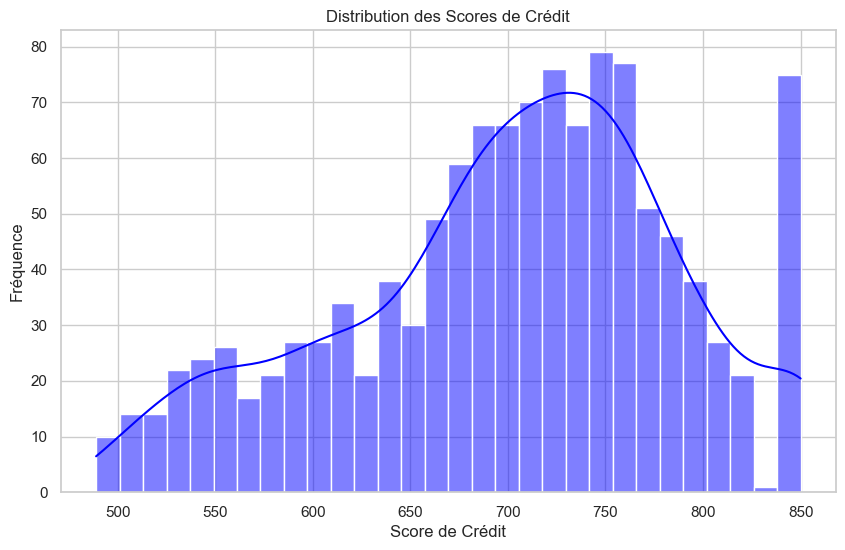

In [143]:
# Visualiser la distribution des scores
plt.figure(figsize=(10, 6))
sns.histplot(hmeq_test["Score"], bins=30, kde=True, color='blue')
plt.title('Distribution des Scores de Crédit')
plt.xlabel('Score de Crédit')
plt.ylabel('Fréquence')
plt.show()


In [144]:
import joblib

# Sauvegarder le modèle Random Forest optimisé
joblib.dump(best_rf, 'best_rf.pkl')

['best_rf.pkl']

In [145]:
hmeq_test.head(25)



,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio,BAD,Prob,Score,Score_Normalized
4798,41314.0,19.000000,0.000000,0.000000,183.631428,1.000000,22.000000,33.665534,0,1.0,0.0,0.0,0.351752,0,0.011627,769,738
3716,33284.0,14.000000,0.000000,0.000000,119.473073,1.000000,17.000000,37.784524,0,0.0,0.0,0.0,0.317029,0,0.053584,712,609
1472,54641.0,5.000000,0.000000,0.000000,323.192928,0.000000,10.000000,33.299628,0,0.0,0.0,0.0,0.167415,0,0.028027,737,664
1050,45240.0,2.000000,0.000000,1.000000,83.066751,0.000000,19.000000,38.454300,0,0.0,0.0,0.0,0.159638,0,0.256027,647,462
87,58000.0,3.500000,0.000000,1.000000,168.666667,0.000000,18.000000,34.802429,1,0.0,0.0,1.0,0.057604,1,0.706428,577,303
637,65022.0,0.000000,0.000000,0.000000,55.873860,0.000000,4.000000,38.375091,0,1.0,0.0,1.0,0.110460,0,0.081363,696,573
5589,109378.0,9.717014,0.000000,0.000000,240.232875,3.000000,13.000000,35.691543,0,0.0,0.0,0.0,0.224823,0,0.020280,749,691
1959,65022.0,8.939604,0.269658,0.460698,178.550352,1.196929,21.275646,25.132449,0,0.0,0.0,0.0,0.143417,0,0.025088,741,674
2959,81933.0,13.000000,0.000000,0.000000,308.532027,0.000000,19.000000,29.603684,0,1.0,0.0,0.0,0.123468,0,0.000000,850,750
5226,71973.0,4.000000,0.000000,0.000000,89.379952,2.000000,32.000000,39.981059,0,0.0,0.0,0.0,0.237368,0,0.029065,735,661


In [146]:
from faker import Faker
fake = Faker()

hmeq_test['Surname'] = [fake.first_name() for _ in range(len(hmeq_test))]
hmeq_test['Name'] = [fake.last_name() for _ in range(len(hmeq_test))]
#On sauvegarde un nouveau csv avec des Noms/Prénoms Random et des scores associés à ces personnes fictives
hmeq_test.to_csv('hmeq_score.csv', index=False)


### Shapley values

Shape of X_test: (1192, 9)
Shape of shap_values: (1192, 9, 2)


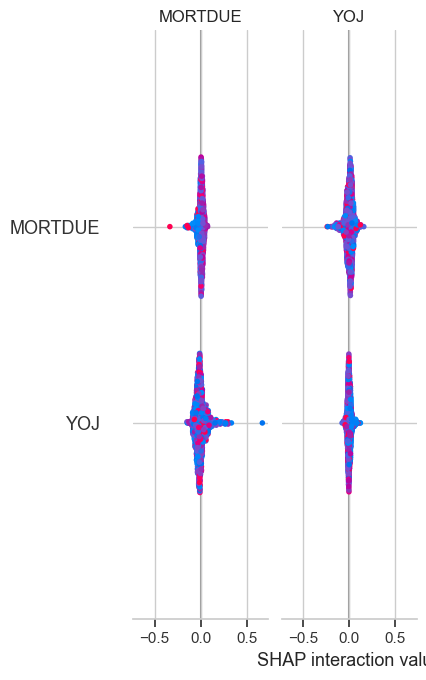

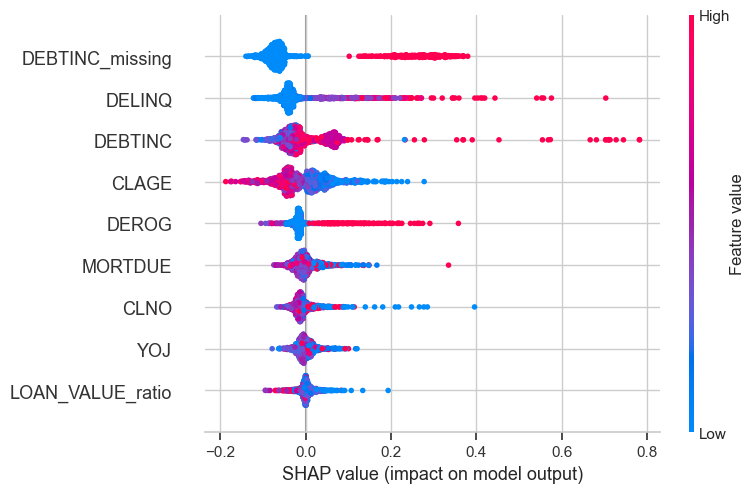

In [147]:
import shap

# Initialisation de l'explainer SHAP pour le modèle de forêt aléatoire
explainer = shap.TreeExplainer(model)

# Calcul des valeurs de Shapley pour l'ensemble de test
shap_values = explainer.shap_values(X_test)

# Vérification des dimensions
print("Shape of X_test:", X_test.shape)
print("Shape of shap_values:", shap_values.shape)

# Visualisation des valeurs SHAP pour toutes les observations avec un beeswarm plot
shap.summary_plot(shap_values, X_test)  # Affiche les valeurs SHAP pour les deux classes

# Visualiser les valeurs SHAP pour la classe 1
shap.summary_plot(shap_values[:, :, 1], X_test)  # Valeurs SHAP pour la classe 1 (index 1)
